## PCA(주성분 분석)  
--- 
- 전체 특성(Feature)에서 주요 특성 압축/융합하는 비지도 학습
- fit() + transfrom() 2단계 거쳐 주성분 분석

In [40]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix

### [1] 데이터 준비

In [41]:
X, y = load_iris(return_X_y=True, as_frame = True)

In [42]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

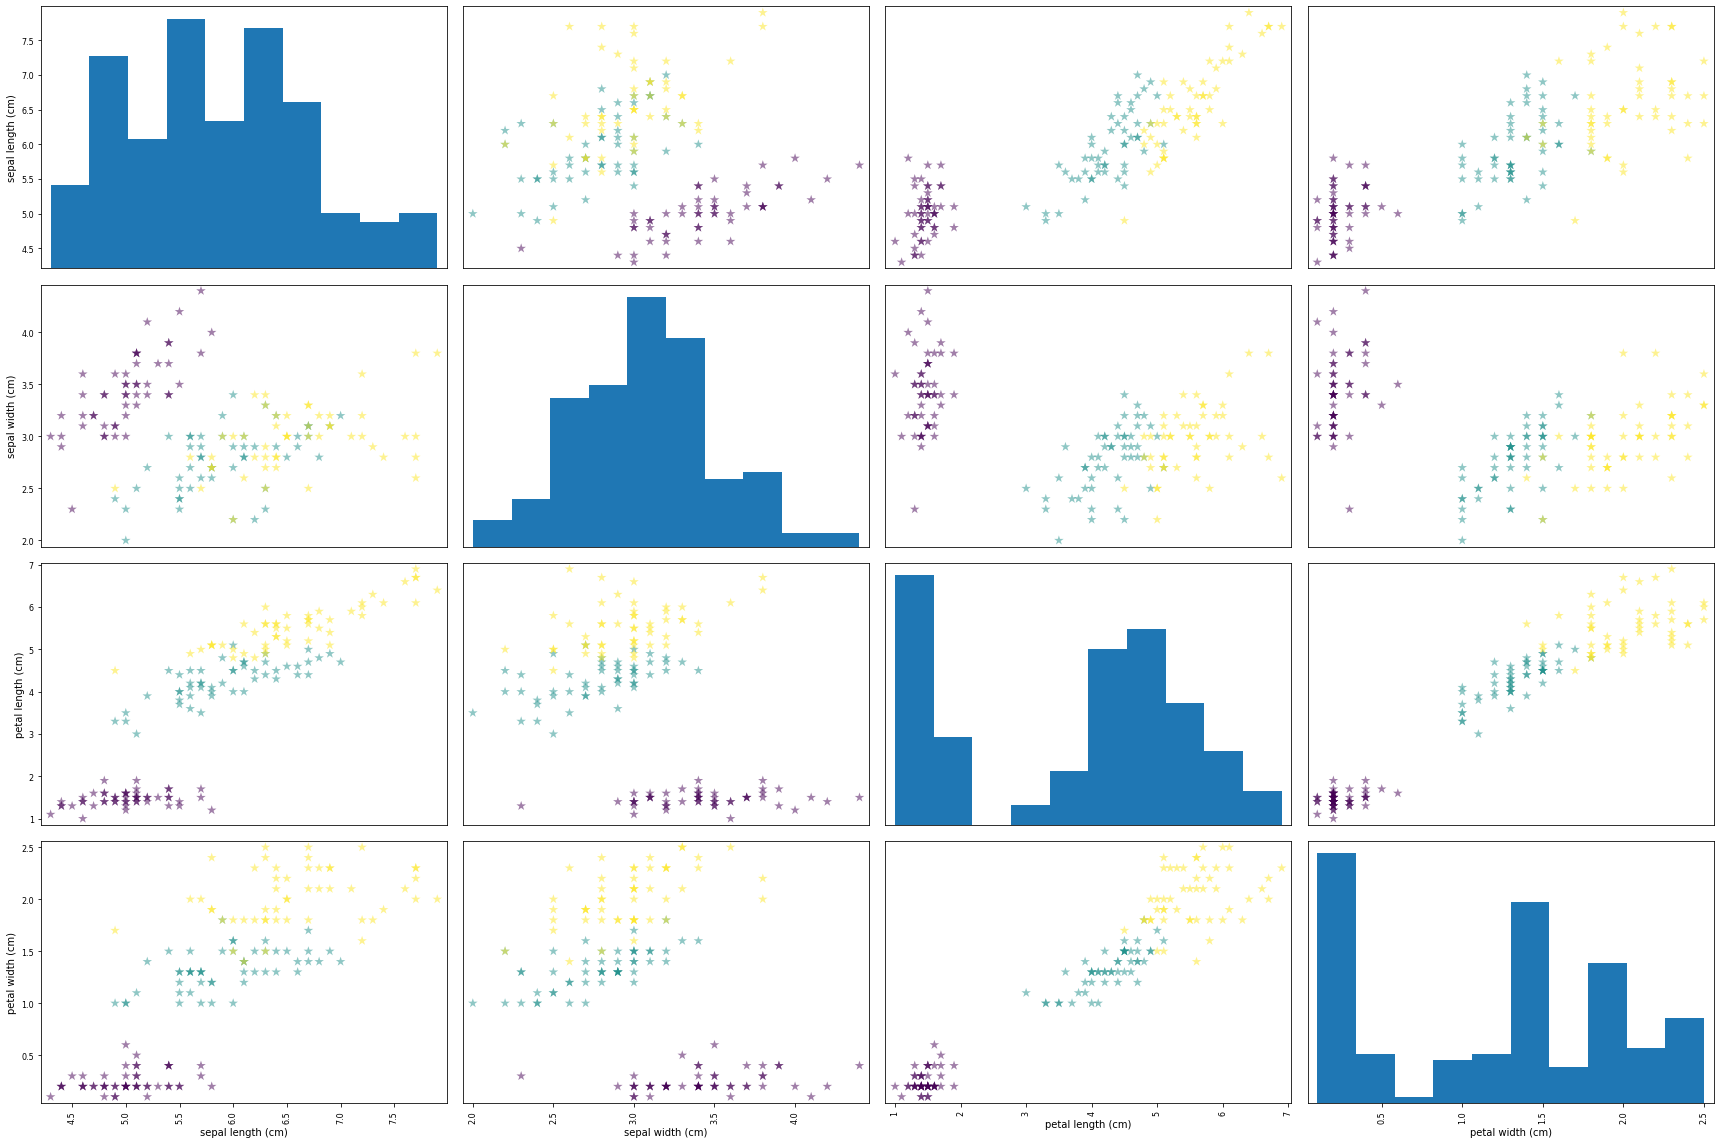

In [43]:
scatter_matrix(X, figsize = (24, 16), c=y, s= 100, marker='*')
plt.tight_layout()

In [44]:
df = load_iris(as_frame=True)

In [45]:
# # 타겟별 시각화
# target_0=df[df.target == 0]
# target_1=df[df.target == 1]
# target_2=df[df.target == 2]

In [46]:
df.col

AttributeError: col

## 데이터 전처리

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

## PCA 주성분 분석
- iris의 4개 Feature 중에서 주성분 데이터 추출

In [47]:
pca=PCA()

# 지정된 데이터에서 주성분 추출
pca.fit(X_scaled)

PCA()

In [48]:
# 주성분 행렬
pca.singular_values_

array([20.92306556, 11.7091661 ,  4.69185798,  1.76273239])

In [49]:
# 주성분에 투영 후 분산 정도 설명
# pca.explained_variance_
pca.explained_variance_ratio_ # 비율로

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

## 주성분 갯수 지정
- 방법 1) explained_variance_ratio_의 누적값에서 원하는 분포 정도를 지정해서 PC갯수 계산

- 방법 2) n_components = 0.0~1.0 : 주성분 투영된 데이터 분포 정도를 지정하면 PC갯수 자동 계산

### 방법 1) explained_variance_ratio_ 누적값으로 PC 차원수 계산

In [50]:
import numpy as np

In [51]:
cumsum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=95)+1

print(f'주성분 갯수(차원) : {d}')

주성분 갯수(차원) : 1


In [52]:
# 지정된 PC 갯수로 주성분 데이터 압축/융합
pca=PCA(n_components=d)

In [55]:
pca.fit(X_scaled)

PCA(n_components=1)

In [54]:
irisPCA=pca.transfrom(X_scaled)

AttributeError: 'PCA' object has no attribute 'transfrom'

In [ ]:
irisPCA.shape
irisPCA[:5]

TypeError: the first argument to axis() must be an iterable of the form [xmin, xmax, ymin, ymax]

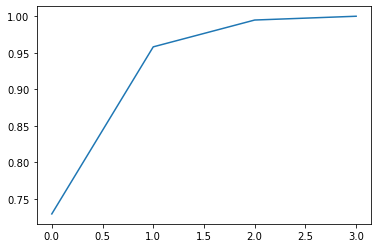

In [60]:
# 주성분과 데이터 데이터 투영 분석 시각화''""
plt.plot((cumsum))
plt.axis([0.4, 0, 1])
plt.xlabel("Dimention")
plt.ylabel("Explaine Variance")
plt.show()

In [56]:
### 방법 2)  n_component=비율값

In [57]:
pca3=PCA(n_components=0.95)

In [58]:
pca3.fit(X_scaled)

PCA(n_components=0.95)

In [59]:
irisPCA=pca.transform(X_scaled)

In [ ]:
pca